In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

import config
from pre_processing import DfBankAdditional

In [2]:
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
    # "ytick.major.right":False,
    # "xtick.major.top":False
},'seaborn'])

In [3]:
df = DfBankAdditional(pd.read_csv(config.bank_additional_train_path, sep=';'))

## Clean

In [4]:
df.process_all()

In [5]:
df = df[['day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
df

,day_of_week,campaign,pdays,previous,poutcome,y
0,0,1,999,0,NaN,0
1,0,1,999,0,NaN,0
2,0,1,999,0,NaN,0
3,0,1,999,0,NaN,0
4,0,1,999,0,NaN,0
...,...,...,...,...,...,...
41183,4,1,999,0,NaN,1
41184,4,1,999,0,NaN,0
41185,4,2,999,0,NaN,0
41186,4,1,999,0,NaN,1


# Day of the Week
They never contact people on the weekend:

In [6]:
calendar.day_name[df['day_of_week'].max()]

'Friday'

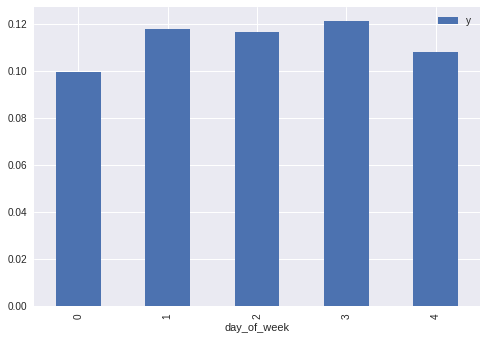

In [7]:
day_of_week_probabilities = df[['day_of_week', 'y']].groupby(by='day_of_week').mean()
day_of_week_probabilities.plot.bar()
# TODO: make the plot prettier

# Time between contacts

In [8]:
df[['pdays', 'previous', 'poutcome', 'y']]

,pdays,previous,poutcome,y
0,999,0,NaN,0
1,999,0,NaN,0
2,999,0,NaN,0
3,999,0,NaN,0
4,999,0,NaN,0
...,...,...,...,...
41183,999,0,NaN,1
41184,999,0,NaN,0
41185,999,0,NaN,0
41186,999,0,NaN,1


In [9]:
previously_contacted_negative_outcome = df.loc[df['poutcome']==0, ('pdays', 'y')]
previously_contacted_negative_outcome

,pdays,y
24013,999,0
24019,999,1
24076,999,0
24102,999,1
24113,999,0
...,...,...
41166,999,1
41170,999,0
41173,999,1
41175,999,0


In [11]:
previously_contacted_negative_outcome['pdays'].unique()

array([999,  10,  11,   5,   9,   7,  12,   6,   3,  14,  13,  15,  16,
         8,   4,  21,  17,  18,  25,  20,  19])